<a href="https://colab.research.google.com/github/sga-noud/TM10007_ML/blob/master/TM10007_ML_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import display

# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

# drive_path = "/content/drive/MyDrive/🎓 Klinische Technologie/TM10007 - Machine Learning/TM10007 ML Group Assignment/" # Noud
# drive_path = "/content/drive/MyDrive/TM10007 ML Group Assignment/" # Mirthe, Noud
drive_path = "/content/drive/MyDrive/1. TM jaar 1/TM10007 Machine Learning/TM10007 ML Group Assignment/" # Inge

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv(drive_path + 'train_set.csv')
# df_test = pd.read_csv(drive_path + 'test_set.csv')

df_train = df_train.replace({'benign': 0, 'malignant': 1})

display(df_train)

,ID,label,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,...,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_peak_WL3_N5,PREDICT_original_phasef_phasesym_peak_position_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5
0,Liver-120_0,0,0.769950,0.100728,28.534344,5.242253,13.680810,4.034948,0.953517,0.029796,...,0.000000,0.093548,3.011776,9.220900,0.0,0,0.382715,183.142015,0.000000,11.442092
1,Liver-179_0,1,0.921971,0.012967,26.781353,2.834847,6.203303,1.634618,0.988528,0.007027,...,0.000000,0.139490,2.238333,4.351725,0.0,0,0.532854,280.054834,0.055424,11.324663
2,Liver-174_0,0,0.882353,0.038590,24.332482,2.238542,6.839077,1.624041,0.979696,0.022137,...,0.000000,0.122213,2.275733,4.689078,0.0,0,0.463167,308.184682,0.062011,11.889003
3,Liver-066_0,0,0.811961,0.062850,34.409760,5.113002,7.018896,2.561812,0.951716,0.034654,...,0.000000,0.128127,2.104333,4.305704,0.0,0,0.471446,1296.641240,0.106167,14.022568
4,Liver-037_0,1,0.829343,0.044008,20.061620,2.806773,7.551700,1.733152,0.961802,0.017807,...,0.000000,0.097203,3.379411,11.655532,0.0,0,0.407905,67.329817,0.000000,9.656807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Liver-012_0,0,0.851577,0.029381,27.900392,3.018271,3.801474,1.740597,0.959481,0.019448,...,0.000000,0.092495,3.278858,11.011162,0.0,0,0.384390,146.741591,0.000000,11.009890
144,Liver-086_0,0,0.886070,0.029175,13.010396,1.435144,9.010365,1.326330,0.985577,0.014219,...,0.182629,0.196229,0.517983,-0.850033,0.0,0,0.635717,240.063167,0.356156,10.749483
145,Liver-124_0,0,0.850849,0.053236,17.468429,2.801192,10.575806,3.586288,0.980488,0.018335,...,0.000000,0.091601,2.841042,8.636412,0.0,0,0.353195,77.533268,0.000000,10.407339
146,Liver-172_0,1,0.811883,0.053475,17.023442,2.815438,6.123259,1.330819,0.965432,0.020839,...,0.000000,0.118278,2.281211,5.204509,0.0,0,0.447038,116.041940,0.082401,10.708701


# Nieuwe sectie

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(df_train.loc[:, df_train.columns!='ID'])

print(X_train_minmax)

# scaler = MinMaxScaler()
df_train_minmax = pd.DataFrame(X_train_minmax)
display(df_train_minmax)

[[0.         0.58548524 0.39826832 ... 0.02377947 0.         0.53726514]
 [1.         0.98840305 0.03417954 ... 0.03649338 0.15561726 0.5254595 ]
 [0.         0.88340063 0.14047861 ... 0.04018371 0.17411137 0.58219498]
 ...
 [0.         0.79990019 0.20124082 ... 0.00992475 0.         0.43323704]
 [1.         0.6966262  0.2022329  ... 0.01497667 0.23136186 0.46353422]
 [1.         0.66231176 0.28991234 ... 0.02230838 0.         0.55366494]]


,0,1,2,3,4,5,6,7,8,9,...,484,485,486,487,488,489,490,491,492,493
0,0.0,0.585485,0.398268,0.295267,0.267292,0.578790,0.250716,0.773999,0.133709,0.403490,...,0.0,0.387839,0.229273,0.065694,0.0,0.0,0.580256,0.023779,0.000000,0.537265
1,1.0,0.988403,0.034180,0.267860,0.111430,0.198164,0.095706,0.940475,0.017617,0.054055,...,0.0,0.637437,0.158165,0.033932,0.0,0.0,0.818483,0.036493,0.155617,0.525459
2,0.0,0.883401,0.140479,0.229573,0.072823,0.230527,0.095023,0.898479,0.094659,0.021026,...,0.0,0.543572,0.161603,0.036132,0.0,0.0,0.707910,0.040184,0.174111,0.582195
3,0.0,0.696831,0.241126,0.387126,0.258924,0.239680,0.155583,0.765438,0.158481,0.166396,...,0.0,0.575702,0.145845,0.033631,0.0,0.0,0.721047,0.169858,0.298091,0.796691
4,1.0,0.742903,0.162956,0.162800,0.109612,0.266801,0.102069,0.813397,0.072583,0.152309,...,0.0,0.407694,0.263072,0.081575,0.0,0.0,0.620225,0.008586,0.000000,0.357783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,0.801830,0.102273,0.285355,0.123305,0.075904,0.102550,0.802360,0.080951,0.057102,...,0.0,0.382117,0.253828,0.077372,0.0,0.0,0.582914,0.019004,0.000000,0.493814
144,0.0,0.893252,0.101420,0.052558,0.020809,0.341051,0.075797,0.926444,0.054286,0.063571,...,1.0,0.945693,0.000000,0.000000,0.0,0.0,0.981697,0.031247,1.000000,0.467634
145,0.0,0.799900,0.201241,0.122257,0.109251,0.420736,0.221742,0.902246,0.075273,0.226089,...,0.0,0.377262,0.213576,0.061881,0.0,0.0,0.533416,0.009925,0.000000,0.433237
146,1.0,0.696626,0.202233,0.115300,0.110173,0.194090,0.076087,0.830654,0.088040,0.265199,...,0.0,0.522193,0.162107,0.039494,0.0,0.0,0.682318,0.014977,0.231362,0.463534


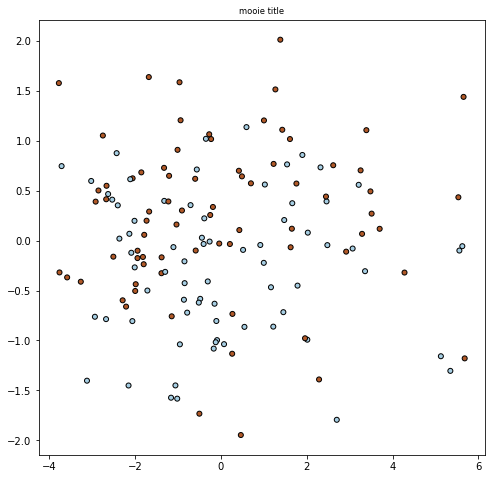

In [96]:
# PCA
from sklearn.decomposition import PCA

x = df_train_minmax[1:]

pca = PCA(n_components=10)
pca = pca.fit(x)
x = pca.transform(x)
# print(x)
y_train = df_train_minmax[0][1:]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("mooie title",
             fontsize='small')
ax.scatter(x[:,0], x[:,4], marker='o', c=y_train,
           s=25, edgecolor='k', cmap=plt.cm.Paired)

In [129]:
# Classifiers
from sklearn.svm import SVC # SVM
from sklearn.gaussian_process.kernels import RBF # RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## SVM
clf_svm = SVC(gamma=0, C=2)
clf_svm.fit(x, y_train)
score_svm = clf_svm.score(x, y_train)
print(f'SVM score: {score_svm}')

# Make predictions on the test data
y_pred = clf_svm.predict(x)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print(f'SVM accur: {accuracy}')
print(f'SVM f1: {f1_score(y_train,y_pred)}')
print(f'SVM roc: {roc_auc_score(y_train, y_pred)}')


## RF
clf_rf = RandomForestClassifier(n_estimators=2, random_state=2, max_depth=3)
clf_rf.fit(x, y_train)
score_rf = clf_rf.score(x, y_train)
print(f'RF score: {score_rf}')

# Make predictions on the test data
y_pred = clf_rf.predict(x)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
print(f'RF accur: {accuracy}')
print(f'RF f1: {f1_score(y_train,y_pred)}')
print(f'RF roc: {roc_auc_score(y_train, y_pred)}')


SVM score: 0.5102040816326531
SVM accur: 0.5102040816326531
SVM f1: 0.6756756756756758
SVM roc: 0.5
RF score: 0.8231292517006803
RF accur: 0.8231292517006803
RF f1: 0.8289473684210527
RF roc: 0.8227777777777777


In [ ]:
# # Randomforest
# from sklearn.metrics import accuracy_score

# rf = RandomForestClassifier(n_estimators=2, random_state=2)
# x_train = x[:,0]
# y_train = x[:,1]

# # Fit the model to the training data
# rf.fit(x_train, y_train)

# # Make predictions on the test data
# y_pred = rf.predict(x_train)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_train, y_pred)
# print("Accuracy:", accuracy)